In [1]:
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
from shapely.geometry import Point
import seaborn as sns
from plotnine import *
from pysal.explore import esda
from pysal.lib import weights 
from matplotlib import colors
from functools import reduce
from matplotlib_scalebar.scalebar import ScaleBar
%matplotlib inline 
%config InlineBackend.figure_format='retina'
# set mamp general general aspect 
plt.rcParams['figure.dpi'] = 150
# set figures path 
Fig = 'Figures/'

C:\Users\Mohamed\miniconda3\lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
C:\Users\Mohamed\miniconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.


# 1. Evolution of the COVID-related mortality rate in European countries

In [ ]:
# figure 1 
ds = pd.read_excel('../../02_Data/02_Pandemic variables/03_Exc. Mortality/Excess_mortality_database_v220103.xls',
                   sheet_name = "EM_FINAL_absolute").drop(['NUTS_ID_2021', 'NUTS_level', 'NUTS level 3', 'Pop_2020_01_01'], axis =1)

In [ ]:
ds = ds.groupby('Country').mean().T
ds

In [ ]:
with plt.style.context('seaborn-deep'):
    ds.plot(figsize = (14,10), marker = 'o', linestyle = '--', cmap = 'tab20', alpha = .7)
plt.title('Weekly evolution of the COVID-related mortality in European countries',
          loc = 'left', fontweight = 'light', color  = '#054ea2')

plt.text(x = pd.Timestamp('2019-12-20'), y = 100, s = 'COVD-19 spread across EU countries', rotation = 90, fontweight = 'bold', color = 'orange')

# # add the years 
plt.vlines(x = pd.Timestamp('2020-01-01'), ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = pd.Timestamp('2020-01-03'), y = 630, s = '2020-01-01', rotation = 90, fontweight = 'bold')

plt.vlines(x = pd.Timestamp('2021-01-01'), ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = pd.Timestamp('2021-01-03'), y = 630, s = '2021-01-01', rotation = 90, fontweight = 'bold')

# # add the waves 
plt.axhspan(xmin =0.12, xmax = 0.24, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = pd.Timestamp('2020-03-15'), y = 758, s = 'First wave', fontweight = 'light')

plt.axhspan(xmin =0.42, xmax = 0.6, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = pd.Timestamp('2020-11-05'), y = 758, s = 'Second wave', fontweight = 'light')

plt.axhspan(xmin =0.64, xmax = 0.8, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = pd.Timestamp('2021-04-16'), y = 758, s = 'Third wave', fontweight = 'light')


plt.axhspan(xmin =0.86, xmax = 0.95, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = pd.Timestamp('2021-08-27'), y = 758, s = 'Fourth wave', fontweight = 'light')


## add the variants 
# Alpha 
plt.vlines(x = pd.Timestamp('2020-11-01'), ymin = -300, ymax = 750, color = 'red', linestyle = 'dashdot')
plt.text(x = pd.Timestamp('2020-10-18'), y = 500, s = 'Alpha variant', fontweight = 'light', rotation = 90, color = 'red')


# Delta
plt.vlines(x = pd.Timestamp('2021-06-28'), ymin = -300, ymax = 750, color = 'red', linestyle = 'dashdot')
plt.text(x = pd.Timestamp('2021-06-16'), y = 500, s = 'Delta variant', fontweight = 'light', rotation = 90, color = 'red')


# Beta
plt.vlines(x = pd.Timestamp('2021-07-18'), ymin = -300, ymax = 750, color = 'red', linestyle = 'dashdot')
plt.text(x = pd.Timestamp('2021-07-06'), y = 500, s = 'Beta variant', fontweight = 'light', rotation = 90, color = 'red')


# Omicron 
plt.vlines(x = pd.Timestamp('2021-11-01'), ymin = -300, ymax = 750, color = 'red', linestyle = 'dashdot')
plt.text(x = pd.Timestamp('2021-10-18'), y = 500, s = 'Omicron variant', fontweight = 'light', rotation = 90, color = 'red')

plt.ylim([-260, 800])
plt.legend(loc = [1.02, .05], frameon = False).set_title('')
sns.despine(offset=2)

# plt.savefig(Fig + 'Figure_01.png', dpi = 500)

## second plot 

In [ ]:
df = pd.read_excel('../../02_Data/02_Pandemic variables/02_Deaths/EU_Deaths_Daily_Stacked.xlsx')

In [ ]:
population = pd.read_excel('../../02_Data/Population_2020.xlsx').drop_duplicates(subset = 'NUTS_ID')
population['Population'].replace(':', np.nan, inplace = True)
population = population.dropna(subset = ['Population'])

In [ ]:
ds = pd.merge(df, population, left_on = 'nuts_id', right_on = 'NUTS_ID')

In [ ]:
ds['deaths'] = ds.eval('(deaths / Population) * 10_000')

In [ ]:
ds

In [ ]:
ds.fillna(0, inplace = True)

In [ ]:
import time
out = {}

print("Data processing for: ")
for num, country in enumerate(df.country.unique()):
    print(num,':',country)
    time.sleep(0.9)
    out[country] = df[df['country'] == country].groupby(pd.Grouper(key='date', freq='1W')).mean()['deaths']
print("Processing the data (100%): FINISHED")

In [ ]:
n = pd.DataFrame(out).reset_index()

In [ ]:
d = n.melt(id_vars = 'date', var_name = "country", value_name = "deaths")

In [ ]:
## use my plot -points- 

fig = plt.figure(figsize = (14, 7.7), constrained_layout = True)

g = sns.scatterplot(x = 'date', y = 'country', data = d, size = 'deaths', sizes = (210, 980),
                alpha = .7, hue = 'deaths', palette = 'magma_r')
plt.xlabel(''), plt.ylabel('')
plt.title('  COVID-19 weekly deaths across the EU countries (per 10,000 inhabitants)',
          loc = 'left', fontweight = 'bold', fontsize = 11, color = '#054ea2')

plt.legend(bbox_to_anchor=(1.02, 0.7),
           borderaxespad=0, frameon = False, title  = 'Deaths')

plt.axvline(pd.Timestamp('2020-03-01'), color='#054ea2', linestyle = 'dashed')
plt.axvline(pd.Timestamp('2020-06-01'), color='#054ea2', linestyle = 'dashed')

plt.xlim([pd.Timestamp("2020-01-01"), pd.Timestamp("2021-12-25")])

plt.show()
# plt.savefig(Fig + 'Daily cases.jpg', dpi = 450)

# 2. COVID-19 deaths rate per 10_000 inhabitants (three waves)

Draw three maps corresponding to each COVID-19 wave.

In [ ]:
# shape["TrueFalse"] = shape['NUTS_ID'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)

In [2]:
## read the shape file 
shape = gpd.read_file('../../02_Data/01_GIS/02_Full file/NUTS_COVID.shp')
nor = gpd.read_file('../../02_Data/01_GIS/03_Norway_GIS/Norway.shp')
nor.rename(columns = {'UID': 'NUTS_ID'}, inplace = True)
nor = nor.to_crs(epsg = 4326)
shape = pd.concat([shape, nor])
shape = shape[~(shape['CNTR_CODE'].isin(['TR', 'RS', 'MK', 'ME', 'AL']))][['NUTS_ID', 'geometry', 'LEVL_CODE']]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
continents = world.dissolve()
cities = pd.read_csv('../../02_Data/world_cities.txt')
# turn lat and lng values into geodata 
geo_points = [Point(x,y) for x,y in zip(cities['lng'], cities['lat'])]
cities = gpd.GeoDataFrame(cities, geometry = geo_points)

Global_nodes = cities[cities['city'].isin(['Paris', 'London'])]
European_engines = cities[cities['city'].isin(['Madrid', 'Barcelona', 'Milan', 'Rome', 'Frankfort', 'Berlin',
                                               'Stockholm', 'Zurich', 'Munich', 'Stuttgart', 'Cologne', 'Dortmund',
                                              'Nijmegen', 'Rotterdam', 'Amsterdam', 'Hamburg', 'Vienna'])]
Strong_megas = cities[cities['city'].isin(['Turin', 'Lyon', 'Athnes', 'Helsinki', 'Oslo', 'Dublin', 'Manchester'])]
Potential_megas = cities[cities['city'].isin(['Lisbon', 'Valencia', 'Bilbao', 'Toulouse', 'Tours', 'Marseille', 'Nice', 'Bern', 'Antwerp',
                                             'Ghent', 'Naples', 'Palma', 'Budapest', 'Prague', 'Warsaw', 'Bratislava'])]

In [23]:
## read the deaths data 
deaths = pd.read_csv('../../02_Data/02_Pandemic variables/02_Deaths/EU_Deaths_Daily_Unstacked.csv', index_col = 'nuts_id').drop(['country', 'Unnamed: 0'], axis =1)
deaths = deaths.reset_index().melt(id_vars = 'nuts_id', var_name = 'date')
deaths['date'] = pd.to_datetime(deaths['date']).dt.normalize()
deaths = deaths.pivot_table(index = 'nuts_id', columns = 'date', values = 'value')
deaths
# # deaths waves 
deaths['D_first_wave'] = deaths.loc[:, pd.to_datetime('2020-02-01') : pd.to_datetime('2020-06-01')].sum(axis =1)
deaths['D_second_wave'] = deaths.loc[:, pd.to_datetime('2020-09-01') : pd.to_datetime('2021-05-01')].sum(axis =1)
deaths['D_third_wave'] = deaths.loc[:, pd.to_datetime('2021-07-01') : pd.to_datetime('2021-12-01')].sum(axis =1)
deaths = deaths.filter(like = 'wave')
# read the popualtion data 

population = pd.read_excel('../../02_Data/Population_2020.xlsx').drop_duplicates(subset = 'NUTS_ID')
population['Population'].replace(':', np.nan, inplace = True)
population = population.dropna(subset = ['Population'])
d = pd.merge(deaths, population, left_on = deaths.index, right_on = "NUTS_ID")
for col in deaths.columns:
    d[col] = (d[col] / d['Population']) * 10_000

In [24]:
geo_d_rate = gpd.GeoDataFrame(pd.merge(d, shape, left_on = 'NUTS_ID', right_on = 'NUTS_ID'))

In [25]:
# convert the geo data 
shape = shape.to_crs(epsg = 3035)
geo_d_rate = geo_d_rate.to_crs(epsg = 3035)
world = world.to_crs(epsg = 3035)
continents = continents.to_crs(epsg = 3035)
Global_nodes.crs = "epsg:4326"; European_engines.crs = "epsg:4326";  Strong_megas.crs = "epsg:4326"; Potential_megas.crs = "epsg:4326"
Global_nodes = Global_nodes.to_crs(epsg = 3035)
European_engines = European_engines.to_crs(epsg = 3035)
Strong_megas = Strong_megas.to_crs(epsg = 3035)
Potential_megas = Potential_megas.to_crs(epsg = 3035)

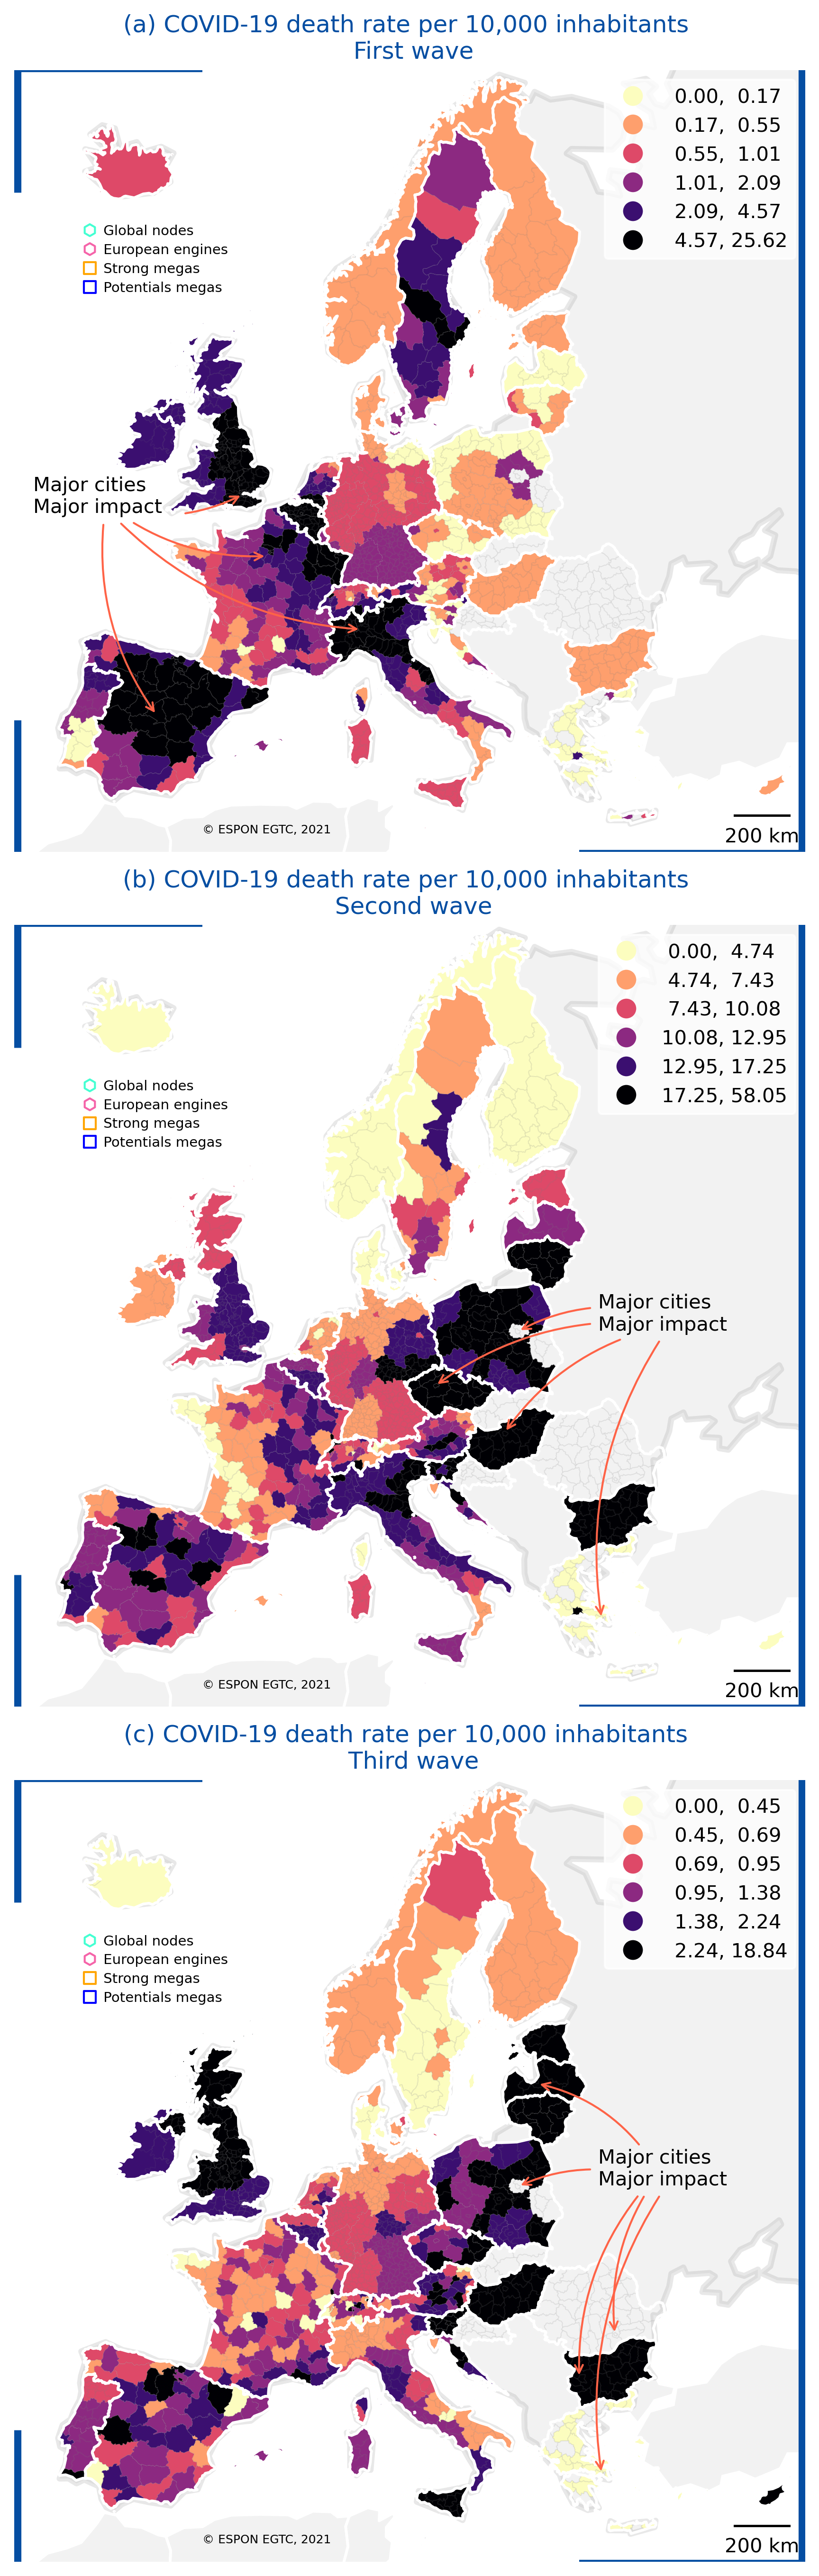

In [26]:
# plot the maps 
fig, ax = plt.subplots(3,1, figsize = (19, 18), constrained_layout = True)
geo_d_rate.plot(column = 'D_first_wave', ax = ax[0], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[0].set_title('(a) COVID-19 death rate per 10,000 inhabitants \n First wave', loc = 'center', color = '#054ea2')


# annotate 
# Paris 
ax[0].annotate("Major cities \nMajor impact", xy=(3.75e6, 2.87e6), xytext=(2.5e6, 3.1e6), weight = 'light',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))
# Madrid
ax[0].annotate("                       ", xy=(3.16e6, 2.02e6), xytext=(2.5e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Milan 
ax[0].annotate("                       ", xy=(4.25e6, 2.48e6), xytext=(2.5e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# London
ax[0].annotate("                       ", xy=(3.62e6, 3.20e6), xytext=(2.5e6, 3.1e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

################################# second map 

geo_d_rate.plot(column = 'D_second_wave', ax = ax[1], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[1].set_title('(b) COVID-19 death rate per 10,000 inhabitants \n Second wave', loc ='center', color = '#054ea2')


# annotate 
# Warsaw 
ax[1].annotate("Major cities \nMajor impact", xy=(5.07e6, 3.29e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))
# Prague 
ax[1].annotate("                       ", xy=(4.63e6, 3.00e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Budapest  
ax[1].annotate("                       ", xy=(5.00e6, 2.75e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Athens  
ax[1].annotate("                       ", xy=(5.52e6, 1.76e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

################################# third map 

geo_d_rate.plot(column = 'D_third_wave', ax = ax[2], cmap='magma_r', scheme='quantiles', k = 6, legend = True)
ax[2].set_title('(c) COVID-19 death rate per 10,000 inhabitants \n Third wave', loc = 'center', color = '#054ea2')

# annotate 
# Bucharest 
ax[2].annotate("Major cities \nMajor impact", xy=(5.59e6, 2.5e6), xytext=(5.5e6, 3.3e6),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Athens 
ax[2].annotate("                       ", xy=(5.52e6, 1.76e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Warsaw 
ax[2].annotate("                  ", xy=(5.07e6, 3.29e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

# Riga 
ax[2].annotate("                 ", xy=(5.17e6, 3.84e6), xytext=(5.5e6, 3.4e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))


# Sofia 
ax[2].annotate("                 ", xy=(5.40e6,  2.27e6), xytext=(5.5e6, 3.3e6), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='tomato'))

################################# wrap up & clean 

for i in range(3): 
    ax[i].set_xlim(2.4e6, 6.6e6)
    ax[i].set_ylim(0.13e7, 0.545e7)
    ax[i].axis('off')
    # legend 
    leg = ax[i].get_legend()
    leg.get_frame().set_color('w')
    # scale bar 
    scalebar = ScaleBar(0.66, width_fraction=None, location= "lower right", box_alpha = 0, length_fraction = 0.08, height_fraction  = 0.003) # 1 pixel = 0.2 meter
    ax[i].add_artist(scalebar)
    # lines 
    ax[i].text(x = 3.4e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 6)
    shape.query('LEVL_CODE == 3').boundary.plot(color = 'gray', linewidth = 0.5, zorder  =1, ax =ax[i], alpha = 0.09)
    world.query('continent == "Europe"').dissolve().boundary.plot(color = 'black', linewidth = 3, alpha = 0.09, ax = ax[i], zorder = -1)
    world.plot(ax = ax[i], color = 'grey', alpha = .1, zorder=0)
    shape.query('LEVL_CODE == 0').boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])
    world.query('continent == "Africa"').boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])
    # add bleu lines 
    ax[i].vlines(x = 2.4e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 2.4e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 6.6e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
    ax[i].hlines(y = 0.13e7, xmin = 5.4e6, xmax = 6.6e6, color = '#054ea2', linewidth = 2)
    ax[i].hlines(y = 0.545e7, xmin = 2.4e6, xmax = 3.4e6, color = '#054ea2', linewidth = 2)
    # add cities
    Global_nodes.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')
    European_engines.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#F564A9')
    Strong_megas.plot(marker = 's', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = 'orange') 
    Potential_megas.plot(marker = 's', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = 'b') 
    # add cities' legend 
    # Global nodes
    ax[i].scatter(x = 2.8e+06, y =4.6e+06, marker = 'h', facecolor = 'w', edgecolor = '#44FFD2' )
    ax[i].text(x = 2.85e+06, y = 4.575e+06, s = ' Global nodes', fontweight = 'light', size = 7)
    # European engines 
    ax[i].scatter(x = 2.8e+06, y =4.5e+06, marker = 'h', facecolor = 'w', edgecolor = '#F564A9' )
    ax[i].text(x = 2.85e+06, y = 4.475e+06, s = ' European engines', fontweight = 'light', size = 7)
    # Strong megas 
    ax[i].scatter(x = 2.8e+06, y =4.4e+06, marker = 's', facecolor = 'w', zorder = 1, edgecolor = 'orange')
    ax[i].text(x = 2.85e+06, y = 4.375e+06, s = ' Strong megas', fontweight = 'light', size = 7)
    # Potential megas 
    ax[i].scatter(x = 2.8e+06, y =4.3e+06, marker = 's', facecolor = 'w', zorder = 1, edgecolor = 'b')
    ax[i].text(x = 2.85e+06, y = 4.275e+06, s = ' Potentials megas', fontweight = 'light', size = 7)
    
# plt.savefig(Fig + 'Figure_02.png', dpi = 500)

## 3. Fatality rate vs Mortality Rate  

In [29]:
## read the deaths data 
cases = pd.read_csv('../../02_Data/02_Pandemic variables/01_Cases/EU_Cases_Daily_Unstacked.csv', index_col = 'nuts_id').drop(['Unnamed: 0', 'country'], axis =1)
cases = cases.reset_index().melt(id_vars = 'nuts_id', var_name = 'date')
cases['date'] = pd.to_datetime(cases['date']).dt.normalize()
cases = cases.pivot_table(index = 'nuts_id', columns = 'date', values = 'value')
cases

# # cases waves 
cases['C_first_wave'] = cases.loc[:, pd.to_datetime('2020-01-01') : pd.to_datetime('2020-06-01')].sum(axis =1)
cases['C_second_wave'] = cases.loc[:, pd.to_datetime('2020-09-01') : pd.to_datetime('2021-05-01')].sum(axis =1)
cases['C_third_wave'] = cases.loc[:, pd.to_datetime('2021-07-01') : pd.to_datetime('2021-12-01')].sum(axis =1)
cases = cases.filter(like = 'wave')
cases

date     C_first_wave  C_second_wave  C_third_wave
nuts_id                                           
AT111            26.0         2176.0        1585.0
AT112           148.0         8467.0        6452.0
AT113           166.0         6423.0        3677.0
AT121           598.0        19143.0       22095.0
AT122           389.0        15718.0       15903.0
...               ...            ...           ...
UKM92           284.0         3853.0       11409.0
UKM93           428.0         5899.0       10922.0
UKM94           399.0         3785.0        8804.0
UKM95          1281.0        17404.0       29243.0
UKN            5340.0       111828.0      181324.0

[1276 rows x 3 columns]

In [30]:
ind = pd.read_excel('Input/Mapping.xlsx')
ind.head(3)

country nuts_id map_nuts
0  Austria   AT111    AT111
1  Austria   AT112    AT112
2  Austria   AT113    AT113

In [31]:
cases['C_first_wave'] = cases['C_first_wave'] + cases['C_first_wave'].mean() 

In [32]:
cas = pd.merge(ind, cases, left_on = 'nuts_id', right_on = cases.index).drop(['country', 'nuts_id'], axis = 1).groupby('map_nuts').sum()

In [33]:
final = pd.merge(deaths, cas, left_on = deaths.index, right_on = cas.index)

In [34]:
final['First_rate'] = (final['D_first_wave'] / final['C_first_wave']) * 100
final['Second_rate'] = (final['D_second_wave'] / final['C_second_wave']) * 100
final['Third_rate'] = (final['D_third_wave'] / final['C_third_wave']) * 100

In [35]:
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final.fillna(0, inplace= True)

In [36]:
geo_final = gpd.GeoDataFrame(pd.merge(final, shape, left_on = 'key_0', right_on = 'NUTS_ID'))

In [37]:
final[final['key_0'].str.contains('')].sort_values(by = 'First_rate', ascending = False)

key_0  D_first_wave  D_second_wave  D_third_wave  C_first_wave  \
226  FRF33         786.0         1448.0          99.0   2099.088558   
271  FRK26         628.0         2312.0         214.0   1705.088558   
192  FR107        1133.0         1579.0         133.0   3245.088558   
218  FRF11         620.0          924.0          93.0   1791.088558   
219  FRF12         748.0          644.0          74.0   2203.088558   
..     ...           ...            ...           ...           ...   
119  EL525           0.0            7.0           0.0   1033.088558   
120  EL531           0.0            1.0           0.0   1030.088558   
104  EL305           0.0           18.0           0.0   1037.088558   
122  EL542           0.0            0.0           0.0   1030.088558   
107  EL413           0.0            1.0           0.0   1032.088558   

     C_second_wave  C_third_wave  First_rate  Second_rate  Third_rate  
226        75681.0       26123.0   37.444823     1.913294    0.378976  
271       207320.0       71473.0   36.830932     1.115184    0.299414  
192       147453.0       41687.0   34.914301     1.070850    0.319044  
218        77848.0       31757.0   34.615820     1.186928    0.292849  
219        43877.0       24428.0   33.952335     1.467739    0.302931  
..             ...           ...         ...          ...         ...  
119         4695.0        8578.0    0.000000     0.149095    0.000000  
120         2886.0        4184.0    0.000000     0.034650    0.000000  
104         6050.0        8728.0    0.000000     0.297521    0.000000  
122         1959.0        7413.0    0.000000     0.000000    0.000000  
107          637.0        1797.0    0.000000     0.156986    0.000000  

[421 rows x 10 columns]

NameError: name 'major_cities' is not defined

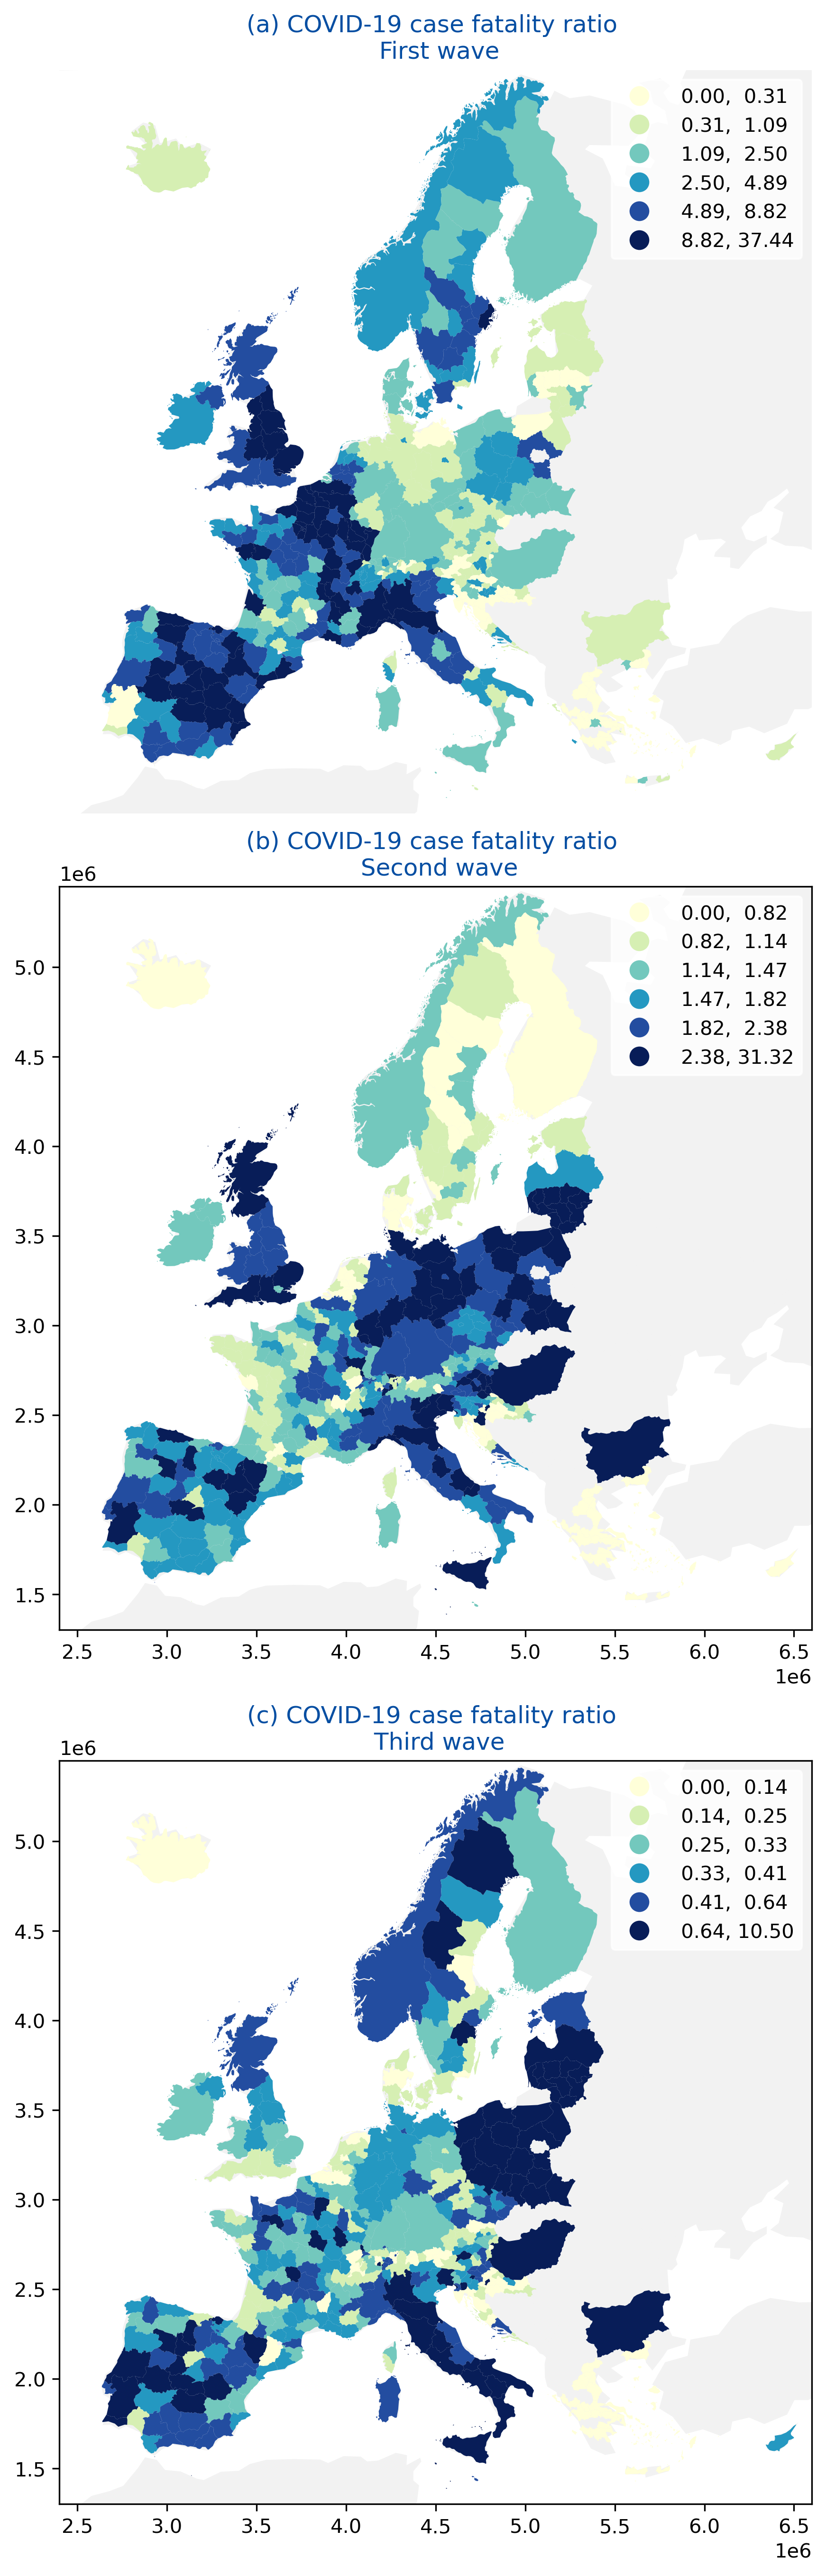

In [38]:
# plot the maps 

fig, ax = plt.subplots(3,1, figsize = (19, 18), constrained_layout = True)
world.plot(ax = ax[0], color = 'grey', alpha = .1)
geo_final.plot(column = 'First_rate', ax = ax[0], cmap='YlGnBu', scheme='quantiles', k = 6, legend = True)
ax[0].set_xlim(2.4e6, 6.6e6)
ax[0].set_ylim(0.13e7, 0.545e7)
ax[0].set_title('(a) COVID-19 case fatality ratio \n First wave', loc = 'center', color = '#054ea2')

# legend 
leg = ax[0].get_legend()
leg.get_frame().set_color('w')




################################# second map 

world.plot(ax = ax[1], color = 'grey', alpha = .1)
geo_final.plot(column = 'Second_rate', ax = ax[1], cmap='YlGnBu', scheme='quantiles', k = 6, legend = True)
ax[1].set_title('(b) COVID-19 case fatality ratio \n Second wave', loc ='center', color = '#054ea2')
ax[1].set_xlim(2.4e6, 6.6e6)
ax[1].set_ylim(0.13e7, 0.545e7)
# legend 
leg = ax[1].get_legend()
leg.get_frame().set_color('w')


################################# third map 

world.plot(ax = ax[2], color = 'grey', alpha = .1)
geo_final.plot(column = 'Third_rate', ax = ax[2], cmap='YlGnBu', scheme='quantiles', k = 6, legend = True)
ax[2].set_title('(c) COVID-19 case fatality ratio \n Third wave', loc = 'center', color = '#054ea2')
ax[2].set_xlim(2.4e6, 6.6e6)
ax[2].set_ylim(0.13e7, 0.545e7)
# legend 
leg = ax[2].get_legend()
leg.get_frame().set_color('w')


################################# wrap up & clean 

for i in range(3): 
    ax[i].axis('off')
    major_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')
    minor_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#F564A9')
    ax[i].text(x = 3.4e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 6)
    world[~(world['iso_a3'].isin(["IRL", "GBR", "ISL","SWE", "ITA"]))].boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])
    # add the graphical-scale 
    scalebar = ScaleBar(0.66, width_fraction=None, location= "lower right", box_alpha = 0, length_fraction = 0.08, height_fraction  = 0.003) # 1 pixel = 0.2 meter
    ax[i].add_artist(scalebar)
    # add bleu lines 
    ax[i].vlines(x = 2.4e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 2.4e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 6.6e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

    ax[i].hlines(y = 0.13e7, xmin = 5.4e6, xmax = 6.6e6, color = '#054ea2', linewidth = 2)
    ax[i].hlines(y = 0.545e7, xmin = 2.4e6, xmax = 3.4e6, color = '#054ea2', linewidth = 2)

# plt.savefig(Fig + 'Figure_03.png', dpi = 500)

## Cluster maps

In [ ]:
from esda.moran import Moran_Local

In [ ]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(geo_d_rate, k=10)
# Row-standardization
w.transform = 'R'

In [ ]:
lisa_1 = esda.moran.Moran_Local(geo_d_rate['D_first_wave'], w)
lisa_2 = esda.moran.Moran_Local(geo_d_rate['D_second_wave'], w)
lisa_3 = esda.moran.Moran_Local(geo_d_rate['D_third_wave'], w)

In [ ]:
counts = pd.value_counts(lisa_1.q)
counts

In [ ]:
cities[cities['city'] == 'Paris'].geometry.y

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (19, 18), constrained_layout = True)

######## Map 1 ###################### 

sig = 1 * (lisa_1.p_sim < 0.05)
hotspot = 1 * (sig * lisa_1.q==1)
coldspot = 3 * (sig * lisa_1.q==3)
doughnut = 2 * (sig * lisa_1.q==2)
diamond = 4 * (sig * lisa_1.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 Not Significant', '1 High-High', '2 Low-High', '3 Low-Low', '4 High-Low']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap(['lightgrey', 'red', 'lightblue', 'blue', 'pink'])

world.plot(ax = ax[0], color = 'grey', alpha = .1)
geo_d_rate.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, legend = True,
        edgecolor='white', ax =ax[0])

ax[0].set_title('(a) Cluster map of COVID-19 death rate \n First wave', loc = 'center', color = '#054ea2')

######## Map 2 ###################### 


sig = 1 * (lisa_2.p_sim < 0.05)
hotspot = 1 * (sig * lisa_2.q==1)
coldspot = 3 * (sig * lisa_2.q==3)
doughnut = 2 * (sig * lisa_2.q==2)
diamond = 4 * (sig * lisa_2.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 Not Significant', '1 High-High', '2 Low-High', '3 Low-Low', '4 High-Low']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap(['lightgrey', 'red', 'lightblue', 'blue', 'pink'])

world.plot(ax = ax[1], color = 'grey', alpha = .1)
geo_d_rate.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, legend = True,
        edgecolor='white', ax =ax[1])
ax[1].set_title('(b) Cluster map of COVID-19 death rate \n Second wave', loc = 'center', color = '#054ea2')


######## Map 3 ###################### 

sig = 1 * (lisa_3.p_sim < 0.05)
hotspot = 1 * (sig * lisa_3.q==1)
coldspot = 3 * (sig * lisa_3.q==3)
doughnut = 2 * (sig * lisa_3.q==2)
diamond = 4 * (sig * lisa_3.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 Not Significant', '1 High-High', '2 Low-High', '3 Low-Low', '4 High-Low']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap(['lightgrey', 'red', 'lightblue', 'blue', 'pink'])

world.plot(ax = ax[2], color = 'grey', alpha = .1)
geo_d_rate.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, legend = True,
        edgecolor='white', ax =ax[2])
ax[2].set_title('(b) Cluster map of COVID-19 death rate \n Third wave', loc = 'center', color = '#054ea2')

# wrap up 

for i in range(3): 
    ax[i].axis('off')
    ax[i].set_xlim(2.4e6, 6.6e6)
    ax[i].set_ylim(0.13e7, 0.545e7)
    major_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')
    minor_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#F564A9')
    ax[i].text(x = 3.4e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 6)
    world[~(world['iso_a3'].isin(["IRL", "GBR", "ISL","SWE", "ITA"]))].boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])
    scalebar = ScaleBar(0.66, width_fraction=None, location= "lower right", box_alpha = 0, length_fraction = 0.08, height_fraction  = 0.003) # 1 pixel = 0.2 meter
    ax[i].add_artist(scalebar)
        # add bleu lines 
    ax[i].vlines(x = 2.4e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 2.4e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 6.6e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

    ax[i].hlines(y = 0.13e7, xmin = 5.4e6, xmax = 6.6e6, color = '#054ea2', linewidth = 2)
    ax[i].hlines(y = 0.545e7, xmin = 2.4e6, xmax = 3.4e6, color = '#054ea2', linewidth = 2)
    
# plt.savefig(Fig + 'Figure_04.png', dpi = 500)

# Mobility data

In [ ]:
mob = pd.read_excel('Input/google_all.xlsx')

In [ ]:
mob.head(3)

In [ ]:
mob['date'] = pd.to_datetime(mob['date'])

In [ ]:
first_wave = mob[(mob['date'] > pd.Timestamp('2020-03-02')) & (mob['date'] < pd.Timestamp('2020-05-01'))]
second_wave = mob[(mob['date'] > pd.Timestamp('2020-09-01')) & (mob['date'] < pd.Timestamp('2021-05-01'))]
third_wave = mob[(mob['date'] > pd.Timestamp('2021-07-01')) & (mob['date'] < pd.Timestamp('2021-12-01'))]

In [ ]:
first_wave = first_wave.groupby(['country_region_code', 'variable']).mean().reset_index()
first_wave['wave'] = 'First wave'
second_wave = second_wave.groupby(['country_region_code', 'variable']).mean().reset_index()
second_wave['wave'] = 'Second wave'
third_wave = third_wave.groupby(['country_region_code', 'variable']).mean().reset_index()
third_wave['wave'] = 'Third wave'

In [ ]:
data = pd.concat([first_wave, second_wave, third_wave])

In [ ]:
data['variable'] = data['variable'].apply(lambda x: x.split('percent')[0])
data['variable'] = data['variable'].apply(lambda x: (x.replace('_', ' ').strip()).capitalize())
data

In [ ]:
data.country_region_code.unique()

In [ ]:
mob_map = {'AT':'Austria',
 'BE':'Belgium',
 'BG':'Bulgaria',
 'HR':'Croatia',
 'CY':'Cyprus',
 'CZ':'Czech Republic',
 'DK':'Denmark',
 'EE':'Estonia',
 'FI':'Finland',
 'FR':'France',
 'DE':'Germany',
 'GR':'Greece',
 'HU':'Hungary',
 'IE':'Ireland',
 'IT':'Italy',
 'LV':'Latvia',
 'LT':'Lithuania',
 'LU':'Luxembourg',
 'MT':'Malta',
 'NL':'Netherlands',
 'PL':'Poland',
 'PT':'Portugal',
 'RO':'Romania',
 'SK':'Slovakia',
 'SI':'Slovenia',
 'ES':'Spain',
 'SE':'Sweden',
 'GB':'United Kingdom',
 'NO':'Norway',
 'CH':'Switzerland',
 'IS':'Iceland',
 'LI': 'Liechtenstein'}

data['country_region_code'] = data['country_region_code'].map(mob_map) 

In [ ]:
data.to_csv('mob_data.csv', index = False)

In [ ]:
# set mamp general general aspect 

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = "white"
plt.rcParams['axes.facecolor'] = '#f4f9fa'

# Social impacts and ecological index 

In [ ]:
## read the data 

pop = pd.read_excel('Input/Selected indicators/Population.xls', skiprows = 10)[['GEO/TIME', '2019', '2020']]
pop.columns = ['GEO/TIME', '2019_POP', '2020_POP']

neet = pd.read_excel('Input/Selected indicators/NEET.xls', skiprows = 12)[['GEO/TIME', '2019', '2020']]
neet.columns = ['GEO/TIME', '2019_NEET', '2020_NEET']

edu = pd.read_excel('Input/Selected indicators/Population by education attainment.xls', skiprows = 11)[['GEO/TIME', '2019', '2020']]
edu.columns = ['GEO/TIME', '2019_EDU', '2020_EDU']

unem = pd.read_excel('Input/Selected indicators/Unemployment.xls', skiprows = 11)[['GEO/TIME', '2019', '2020']]
unem.columns = ['GEO/TIME', '2019_UNEM', '2020_UNEM']

youth_unem = pd.read_excel('Input/Selected indicators/Youth unemployment.xls', skiprows = 11)[['GEO/TIME', '2019', '2020']]
youth_unem.columns = ['GEO/TIME', '2019_YOUTH', '2020_YOUTH']

emp = pd.read_excel('Input/Selected indicators/Employment.xls', skiprows = 10)[['GEO/TIME', '2019', '2020']]
emp.columns = ['GEO/TIME', '2019_EMP', '2020_EMP']

In [ ]:
# initiate a list 
indicators = [pop, neet, edu, unem, youth_unem, emp]

In [ ]:
# add the nuts_id and nuts_name collumns
for i, v in enumerate(indicators):
    indicators[i]['NUTS_ID'] = indicators[i]['GEO/TIME'].apply(lambda x: x.split('-')[0].strip())
    indicators[i]['NUTS_NAME'] = indicators[i]['GEO/TIME'].apply(lambda x: x.split('-')[1].strip())
    indicators[i].drop('GEO/TIME', axis =1, inplace = True)
# drop the repeated nuts_name 
for num in range(1, 6):
    indicators[num].drop('NUTS_NAME', axis = 1, inplace = True)

In [ ]:
ds = reduce(lambda  left,right: pd.merge(left,right,on=['NUTS_ID'],
                                            how='outer'), indicators)

In [ ]:
ds = gpd.GeoDataFrame(pd.merge(ds, shape, on = 'NUTS_ID'))
ds.dropna(axis = 0, inplace = True)

In [ ]:
clusters = ds.copy()

In [ ]:
index = ds[['NUTS_ID', 'geometry']]

#### 1. Ecological index 

In [ ]:
# import PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, robust_scale
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA(n_components = 1)

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca)])

In [ ]:
first = ds.filter(like = '2019')
second = ds.filter(like = '2020')

In [ ]:
first['2019_POP'] = first['2019_POP'] / 10_00000
first['2019_EMP'] = first['2019_EMP'] / 100
first['2019_EDU'] = first['2019_EDU'] / 100
# round the vlaues 
for col in first.columns:
    first[col] = first[col].apply(lambda x: round(x))

In [ ]:
second['2020_POP'] = second['2020_POP'] / 10_00000
second['2020_EMP'] = second['2020_EMP'] / 100
second['2020_EDU'] = second['2020_EDU'] / 100
# round the vlaues 
for col in second.columns:
    second[col] = second[col].apply(lambda x: round(x))

In [ ]:
first = pd.DataFrame(pca.fit_transform(first) / 100)
first.columns = ['2019']
second = pd.DataFrame(pca.fit_transform(second) / 100)
second.columns = ['2020']

In [ ]:
ds = gpd.GeoDataFrame(pd.concat([first, second, index], axis =1))

In [ ]:
ds.dropna(axis =0, inplace = True)

In [ ]:
ds = ds.to_crs(epsg = 3035)
ds = ds[(~ds['NUTS_ID'].str.contains('TR'))]

In [ ]:
drop = ['DE', 'FR', 'ES', 'RS', 'CH04', 'HR03','BE',
 'BG',
 'CZ',
 'DK',
 'EE',
 'IE',
 'EL',
 'HR',
 'IT',
 'CY',
 'LV',
 'LT',
 'LU',
 'HU',
 'MT',
 'NL',
 'AT',
 'PL',
 'PT',
 'RO',
 'SI',
 'SK',
 'FI',
 'SE',
 'IS',
 'NO',
 'CH',
 'UK',
 'ME',
 'MK', 'AT34']
ds = ds[~(ds['NUTS_ID'].isin(drop))]

In [ ]:
ds.sort_values(by = '2020', ascending = False)

In [ ]:
[i for i in ds['NUTS_ID'] if len(i) == 2]

In [ ]:
ds['2019'].hist()

In [ ]:
bins = [-2, -1, 0, 1, 2, 10]
label = ['-2 -- -1', '-1 -- 0', '0 -- 1', '1 -- 2', '> 2']
for col in ['2019', '2020']:
    ds[col] = pd.cut(ds[col], bins = bins, labels= label)

In [ ]:
# ,
#         legend_kwds = {'label': "Ecological index (EI)",
#                            'orientation': "horizontal",
#                           'shrink': .3,
#                           'pad': 0.02}

In [ ]:
# plot the maps 

fig, ax = plt.subplots(1,2, figsize = (19, 18), constrained_layout = True)
world.plot(ax = ax[0], color = 'grey', alpha = .1)
ds.plot(column = '2019', ax = ax[0], legend = True, cmap = 'bwr', categorical = True)
ax[0].set_title('(a) Ecological index of COVID-19 social impacts \n Before the pandemic (2019)', loc = 'center', color = '#054ea2', fontweight = 'bold')

################################# second map 

world.plot(ax = ax[1], color = 'grey', alpha = .1)
ds.plot(column = '2020', ax = ax[1], legend = True, cmap = 'bwr', categorical = True)
ax[1].set_title('(b) Ecological index of COVID-19 social impacts \n During the pandemic (2020)', loc ='center', color = '#054ea2', fontweight = 'bold')


################################# wrap up & clean 

for i in range(2): 
    ax[i].set_xlim(2.4e6, 6.6e6)
    ax[i].set_ylim(0.13e7, 0.545e7)
    ax[i].axis('off')
    major_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')
    minor_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#F564A9')
    ax[i].text(x = 3.4e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 6)
    world[~(world['iso_a3'].isin(["IRL", "GBR", "ISL","SWE", "ITA"]))].boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])
    scalebar = ScaleBar(0.66, width_fraction=None, location= "lower right", box_alpha = 0, length_fraction = 0.08, height_fraction  = 0.003) # 1 pixel = 0.2 meter
    ax[i].add_artist(scalebar)
    # legend 
    # leg = ax[i].get_legend()
    # leg.get_frame().set_color('w')
         # add bleu lines 
    ax[i].vlines(x = 2.4e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 2.4e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 6.6e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

    ax[i].hlines(y = 0.13e7, xmin = 5.4e6, xmax = 6.6e6, color = '#054ea2', linewidth = 2)
    ax[i].hlines(y = 0.545e7, xmin = 2.4e6, xmax = 3.4e6, color = '#054ea2', linewidth = 2)
    
plt.subplots_adjust(wspace=0.1)
# plt.savefig(Fig + 'Figure_05.png', dpi = 500)
plt.show()

#### 2. Clusters 

In [ ]:
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn 
import pandas
import geopandas 
import numpy
import matplotlib.pyplot as plt

In [ ]:
clusters[clusters['NUTS_ID'].str.contains('DK')].NUTS_ID.to_list()

In [ ]:
shape[shape['NUTS_ID'].str.contains('NO')]

In [ ]:
clusters[clusters['NUTS_ID'].str.contains('NO')]

In [ ]:
clusters = clusters[~(clusters['NUTS_ID'].isin(['ITG1', 'ITG2', 'ES7', 'ES70', 'ES', 'ES53', 'ES5',
                                                'ITG', 'IT', 'FR', 'ES63', 'ES64', '', 'PT200', 'PT300',
                                                'FRM0', 'FRM', 'FRY', 'PT2', 'PT3', 'PT20', 'PT30',
                                               'FRY1', 'FRY2', 'FRY3', 'FRY4', 'FRY5', 'TR', 'PT',
 'TR1','CY', 'CY0', 'CY00',
 'TR10',
 'TR2',
 'TR21',
 'TR22', 'DE',
 'TR3',
 'TR31',
 'TR32',
 'TR33',
 'TR4',
 'TR41','DK0', 'DK01', 'DK02', 'DK03', 'DK04', 'DK05',
 'TR42',
 'TR5',
 'TR51',
 'TR52',
 'TR6',
 'TR61',
 'TR62',
 'TR63',
 'TR7',
 'TR71',
 'TR72',
 'TR8',
 'TR81',
 'TR82',
 'TR83',
 'TR9',
 'TR90',
 'TRA',
 'TRA1',
 'TRA2',
 'TRB',
 'TRB1',
 'TRB2',
 'TRC',
 'TRC1', 'EL', 
 'TRC2', 'UKM6', 'UKM61', 'UKM62', 'UKM63', 'UKM64', 'UKM65', 'UKM66', 'UK',
 'TRC3', 'MT00', 
                                               'BE',
 'BG',
 'CZ',
 'DK',
 'EE',
 'IE',
 'EL',
 'HR',
 'IT',
 'CY',
 'LV',
 'LT',
 'LU',
 'HU',
 'MT',
 'NL',
 'AT',
 'PL',
 'PT',
 'RO',
 'SI',
 'SK',
 'FI',
 'SE',
 'IS',
 'CH',
 'UK',
 'ME',
 'MK',
                                               'BE1',
 'BE2',
 'BE3',
 'BG3',
 'BG4',
 'CZ0',
 'DE1',
 'DE2',
 'DE3',
 'DE4',
 'DE5',
 'DE6',
 'DE7',
 'DE8',
 'DE9',
 'DEA',
 'DEB',
 'DEC',
 'DED',
 'DEE',
 'DEF',
 'DEG',
 'EE0',
 'IE0',
 'EL3',
 'EL4',
 'EL5',
 'EL6',
 'ES1',
 'ES2',
 'ES3',
 'ES4',
 'ES6',
 'FR1',
 'FRB',
 'FRC',
 'FRD',
 'FRE',
 'FRF',
 'FRG',
 'FRH',
 'FRI',
 'FRJ',
 'FRK',
 'FRL',
 'HR0',
 'ITC',
 'ITH',
 'ITI',
 'ITF',
 'LV0',
 'LT0',
 'LU0',
 'HU1',
 'HU2',
 'HU3',
 'MT0',
 'NL1',
 'NL2',
 'NL3',
 'NL4',
 'AT1',
 'AT2',
 'AT3',
 'PL2',
 'PL4',
 'PL5',
 'PL6',
 'PL7',
 'PL8',
 'PL9', 'RS',
 'PT1',
 'RO1',
 'RO2',
 'RO3',
 'RO4',
 'SI0',
 'SK0',
 'FI1',
 'FI2',
 'SE1',
 'SE2',
 'SE3',
 'IS0',
 'CH0',
 'UKC',
 'UKD',
 'UKE',
 'UKF',
 'UKG',
 'UKH',
 'UKI',
 'UKJ',
 'UKK',
 'UKL',
 'UKM',
 'UKN',
 'ME0',
 'MK0',
 'RS1',
 'RS2']))]
clusters.plot(figsize = (19,18))

In [ ]:
[names for names in clusters.NUTS_ID if len(names) == 2]

In [ ]:
[names for names in clusters.NUTS_ID if len(names) == 3]

In [ ]:
from sklearn.neighbors import DistanceMetric
from math import radians
import pandas as pd
import numpy as np

In [ ]:
one = pd.concat([clusters[['NUTS_ID', 'geometry']],
                 clusters.filter(like= "2019")], axis =1)

two = pd.concat([clusters[['NUTS_ID', 'geometry']],
                 clusters.filter(like= "2020")], axis =1)

In [ ]:
one.plot( column = '2019_NEET')

In [ ]:
one['centroid'] = one.geometry.centroid

In [ ]:
matter = gpd.GeoDataFrame(one[['2019_NEET', 'centroid']])

In [ ]:
geo = [Point(xy) for xy in zip(matter.centroid.x, matter.centroid.y)]

In [ ]:
gdf = gpd.GeoDataFrame(matter['2019_NEET'], geometry = geo)

In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs

In [ ]:
gplt.pointplot(gdf, hue = '2019_NEET')

In [ ]:
gdf.to_file('google/file.shp')

In [ ]:
ax = gplt.kdeplot(
    collisions.head(1000), clip=one.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [ ]:
gdf['2019_NEET'].hist()

In [ ]:
gdf['2019_NEET'] = pd.cut(gdf['2019_NEET'], 3, labels=["low", "medium", "high"])

In [ ]:
gdf

In [ ]:
ax = gplt.kdeplot(gdf, projection=gcrs.AlbersEqualArea(), clip=one.geometry,
                  cmap = "Spectral_r", shade = True, thresh = 0.05)
gplt.polyplot(one, ax=ax, zorder=1)

##### compute distance matrix

##### 2019

In [ ]:
two['centroids'] = one.geometry.centroid

In [ ]:
dis_matrix = pd.concat([two['NUTS_ID'], two['centroids'].x, two['centroids'].y], axis =1)
dis_matrix.columns = ['NUTS_ID', 'x', 'y']
dis_matrix['x'] = np.radians(dis_matrix['x'])
dis_matrix['y'] = np.radians(dis_matrix['y'])
dis_matrix

In [ ]:
dist = DistanceMetric.get_metric('haversine')

In [ ]:
dist.pairwise(dis_matrix[['x','y']].to_numpy())*6373

In [ ]:
d = pd.DataFrame(dist.pairwise(dis_matrix[['x','y']].to_numpy())*6373,  columns=dis_matrix.NUTS_ID.unique(), index=dis_matrix.NUTS_ID.unique())

In [ ]:
d.to_csv('D.geo.csv', index = False)

In [ ]:
one['2019_POP'] = one['2019_POP'] / 10_000
one['2019_EDU'] = one['2019_EDU'] / 10
one['2019_EMP'] = one['2019_EMP'] / 10

two['2020_POP'] = two['2020_POP'] / 10_000
two['2020_EDU'] = two['2020_EDU'] / 10
two['2020_EMP'] = two['2020_EMP'] / 10


two

In [ ]:
one.drop(['geometry'], axis =1).to_csv('D0_2019.csv', index = False)

In [ ]:
two.drop(['geometry', 'centroids'], axis =1).to_csv('D0_2020.csv', index = False)

In [ ]:
clusters[['NUTS_ID', 'geometry']].to_file('Med/GIS.shp')

In [ ]:
# 69 70 71 77 210 219
clusters

##### 2020

In [ ]:
two.drop(['geometry'], axis =1).to_csv('D0_2020.csv', index = False)

In [ ]:
d.shape

In [ ]:
cluster_variables =  [
    '2019_POP', 
    '2019_NEET',
    '2019_EDU',
    '2019_UNEM',
    '2019_YOUTH',
    '2019_EMP'
]

In [ ]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12), constrained_layout = True)
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    one.plot(
        column=col, 
        ax=ax,
        scheme='Quantiles', 
        linewidth=0,
        cmap='RdPu'
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col, color = 'tomato')
# Display the figure
plt.show()

In [ ]:
one_index = pd.read_csv('index_2019.csv')
two_index = pd.read_csv('index_2020.csv')
one_index.columns = ['ID', 'Cluster']
two_index.columns = ['ID', 'Cluster']

In [ ]:
ls.Cluster.value_counts()

In [ ]:
ls = gpd.GeoDataFrame(pd.merge(one, one_index, left_on = "NUTS_ID", right_on = 'ID'))
ls_map = {1: '1 (116)', 2: '2 (83)', 3: ' 3 (25)' , 4: '4 (22)', 5: '5 (3)', 6 : "6 (27)"}
ls['Cluster'] = ls['Cluster'].map(ls_map)
ls['Cluster'] = ls['Cluster'].apply(lambda x: f'Cluster {x}')
ls

In [ ]:
ls_2.Cluster.value_counts()

In [ ]:
ls_2 = gpd.GeoDataFrame(pd.merge(two, two_index, left_on = "NUTS_ID", right_on = 'ID'))
ls2_map = {1: '1 (116)', 2: '2 (83)', 3: ' 3 (25)' , 4: '4 (17)', 5: '5 (8)', 6 : '6 (27)'}
ls_2['Cluster'] = ls_2['Cluster'].map(ls2_map)
ls_2['Cluster'] = ls_2['Cluster'].apply(lambda x: f'Cluster {x}')
ls_2

In [ ]:
w = Queen.from_dataframe(one)

In [ ]:
# Set seed for reproducibility
numpy.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [Moran(one[variable], w) for variable in cluster_variables]
# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim) for variable,res in zip(cluster_variables, mi_results)
]
# Display on table
table = pandas.DataFrame(
    mi_results,
    columns=['Variable', "Moran's I", 'P-value']
).set_index('Variable')
table

In [ ]:
_ = seaborn.pairplot(one[cluster_variables], kind='reg', diag_kind='kde')

In [ ]:
from sklearn.preprocessing import robust_scale

In [ ]:
one_scaled = robust_scale(one[cluster_variables])

In [ ]:
one_scaled

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Set seed for reproducibility
numpy.random.seed(0)
# Iniciate the algorithm
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
# Run clustering
model.fit(one_scaled)
# Assign labels to main data table
one['ward5'] = model.labels_

In [ ]:
ward5sizes = one.groupby('ward5').size()
ward5sizes

In [ ]:
ward5means = one.groupby('ward5')[cluster_variables].mean()
ward5means.T.round(3)

In [ ]:
# Index db on cluster ID
tidy_db = ls.set_index('Cluster')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(
    columns={'level_1': 'Attribute', 0: 'Values'}
)
# Check out result
tidy_db.head()

In [ ]:
# Setup the facets


facets = seaborn.FacetGrid(
    data=tidy_db,
    col='Attribute',
    hue='Cluster', 
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3
)
# Build the plot as a `sns.kdeplot`
facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()
plt.savefig(Fig + 'Explanation.jpeg', dpi = 500)
plt.show()

In [ ]:
# Index db on cluster ID
tidy_db = one.set_index('ward5')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(
    columns={'level_1': 'Attribute', 0: 'Values'}
)
# Check out result
tidy_db.head()

In [ ]:
# Setup the facets


facets = seaborn.FacetGrid(
    data=tidy_db,
    col='Attribute',
    hue='ward5', 
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3
)
# Build the plot as a `sns.kdeplot`
facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend();

In [ ]:
# Set the seed for reproducibility
numpy.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage='ward', connectivity=w.sparse, n_clusters=5
)
# Fit algorithm to the data
model.fit(one_scaled)

In [ ]:
one['ward5wq'] = model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
one.plot(column='ward5wq', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [ ]:
one

In [ ]:
w = KNN.from_dataframe(one, k=4)

In [ ]:
# Set the seed for reproducibility
numpy.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage='ward', connectivity=w.sparse, n_clusters=5
)
# Fit algorithm to the data
model.fit(one_scaled)

In [ ]:
one['ward5wknn'] = model.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth 
# including a legend and with no boundary lines
one.plot(
    column='ward5wknn', 
    categorical=True, 
    legend=True, 
    linewidth=0, 
    ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [ ]:
ls

In [ ]:
# plot the maps 

fig, ax = plt.subplots(1,2, figsize = (19, 18), constrained_layout = True)
world.plot(ax = ax[0], color = 'grey', alpha = .1)
ls.plot(column = 'Cluster', ax = ax[0], legend = True, cmap = 'Set2', categorical = True,
        edgecolor = 'w', linewidth = .1)
ax[0].set_title('(a) Hierarchical clustering with soft contiguity contraints \n Before the pandemic (2019)', loc = 'center', color = '#054ea2', fontweight = 'bold')

################################# second map 

world.plot(ax = ax[1], color = 'grey', alpha = .1)
ls_2.plot(column = 'Cluster', ax = ax[1], legend = True, cmap = 'Set2', categorical = True,
        edgecolor = 'w', linewidth = .1)
ax[1].set_title('(b) Hierarchical clustering with soft contiguity contraints \n During the pandemic (2020)', loc ='center', color = '#054ea2', fontweight = 'bold')


################################# wrap up & clean 

for i in range(2): 
    ax[i].set_xlim(2.4e6, 6.6e6)
    ax[i].set_ylim(0.13e7, 0.545e7)
    ax[i].axis('off')
    major_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#44FFD2')
    minor_cities.plot(marker = 'h', ax = ax[i], facecolor = 'w', zorder = 1, edgecolor = '#F564A9')
    ax[i].text(x = 3.4e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 6)
    world[~(world['iso_a3'].isin(["IRL", "GBR", "ISL","SWE", "ITA"]))].boundary.plot(color = 'w', linewidth = 1.4 , zorder  =1, ax =ax[i])
    scalebar = ScaleBar(0.66, width_fraction=None, location= "lower right", box_alpha = 0, length_fraction = 0.08, height_fraction  = 0.003) # 1 pixel = 0.2 meter
    ax[i].add_artist(scalebar)
    # legend 
    leg = ax[i].get_legend()
    leg.get_frame().set_color('w')
         # add bleu lines 
    ax[i].vlines(x = 2.4e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 2.4e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
    ax[i].vlines(x = 6.6e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

    ax[i].hlines(y = 0.13e7, xmin = 5.4e6, xmax = 6.6e6, color = '#054ea2', linewidth = 2)
    ax[i].hlines(y = 0.545e7, xmin = 2.4e6, xmax = 3.4e6, color = '#054ea2', linewidth = 2)
    
plt.subplots_adjust(wspace=0.1)
plt.savefig(Fig + 'Figure_06.png', dpi = 500)
plt.show()

# 4. COVID-19 Deaths by country 

In [ ]:
ds = deaths.reset_index()

ds['Country'] = ds['nuts_id'].apply(lambda x: x[:2])
ds

with plt.style.context('seaborn-deep'):
    fig, ax = plt.subplots(2,1, figsize = (10,7), constrained_layout = True)
    ds.groupby('Country').sum().plot(kind = 'bar', ylabel = '', xlabel = '',
                                    cmap = 'Set3', ax =ax[0])
    ax[0].set_title('COVID-19 deaths by country',  color = '#054ea2')
    
sns.despine(offset=2)

# 7. Descriptive statistics

# 6. Correlation matrix